In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## General Dataset Exploration

In [29]:
data = pd.read_csv('Student-Employability-Datasets-1.csv')
data.head(5)

,Name of Student,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
0,Student 1,4,5,4,5,5,5,5,5,Employable
1,Student 2,4,4,4,4,4,4,3,5,Employable
2,Student 3,4,3,3,3,3,3,2,5,LessEmployable
3,Student 4,3,3,3,2,3,3,3,5,LessEmployable
4,Student 5,4,4,3,3,4,4,3,5,Employable


In [30]:
# Se cambian los valores str de la variable objetivo a numerico.
data.CLASS.replace(['Employable', 'LessEmployable'], [1,0], inplace=True)

/var/folders/nq/zht86vzj6n5g3py55h5xd7xr0000gn/T/ipykernel_98974/434224127.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.CLASS.replace(['Employable', 'LessEmployable'], [1,0], inplace=True)
/var/folders/nq/zht86vzj6n5g3py55h5xd7xr0000gn/T/ipykernel_98974/434224127.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_si

In [31]:
# Se nota que hay 2982 observaciones.
data.shape

(2982, 10)

In [32]:
# Nombre de columna
data.columns

Index(['Name of Student', 'GENERAL APPEARANCE', 'MANNER OF SPEAKING',
       'PHYSICAL CONDITION', 'MENTAL ALERTNESS', 'SELF-CONFIDENCE',
       'ABILITY TO PRESENT IDEAS', 'COMMUNICATION SKILLS',
       'Student Performance Rating', 'CLASS'],
      dtype='object')

In [33]:
# Tipo de datos por columna
data.dtypes

Name of Student               object
GENERAL APPEARANCE             int64
MANNER OF SPEAKING             int64
PHYSICAL CONDITION             int64
MENTAL ALERTNESS               int64
SELF-CONFIDENCE                int64
ABILITY TO PRESENT IDEAS       int64
COMMUNICATION SKILLS           int64
Student Performance Rating     int64
CLASS                          int64
dtype: object

In [34]:
# Es una base de datos limpia, sin valores nulls.
data.isnull().sum()

Name of Student               0
GENERAL APPEARANCE            0
MANNER OF SPEAKING            0
PHYSICAL CONDITION            0
MENTAL ALERTNESS              0
SELF-CONFIDENCE               0
ABILITY TO PRESENT IDEAS      0
COMMUNICATION SKILLS          0
Student Performance Rating    0
CLASS                         0
dtype: int64

In [35]:
# Descripcion estadística de los datos
data.describe()

,GENERAL APPEARANCE,MANNER OF SPEAKING,PHYSICAL CONDITION,MENTAL ALERTNESS,SELF-CONFIDENCE,ABILITY TO PRESENT IDEAS,COMMUNICATION SKILLS,Student Performance Rating,CLASS
count,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000,2982.000000
mean,4.246814,3.884641,3.972166,3.962777,3.910798,3.813883,3.525486,4.610664,0.579812
std,0.678501,0.757013,0.744135,0.781982,0.807602,0.739390,0.743881,0.692845,0.493672
min,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,0.000000
25%,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,0.000000
50%,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,1.000000
75%,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000


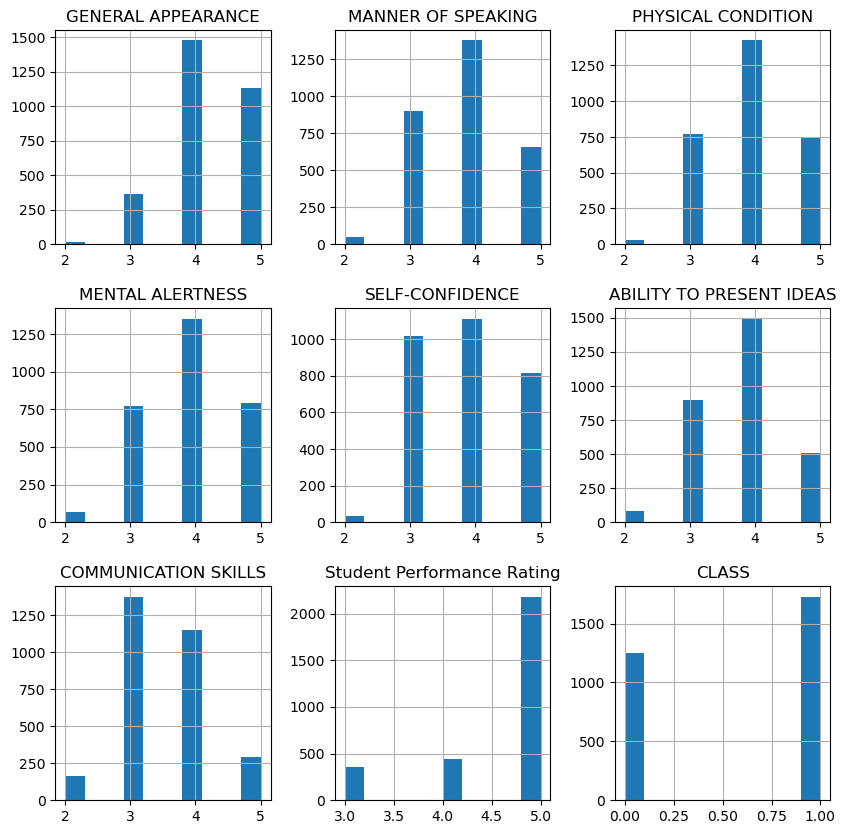

In [36]:
# Histogramas de características numéricas
data.hist(figsize = (10,10));

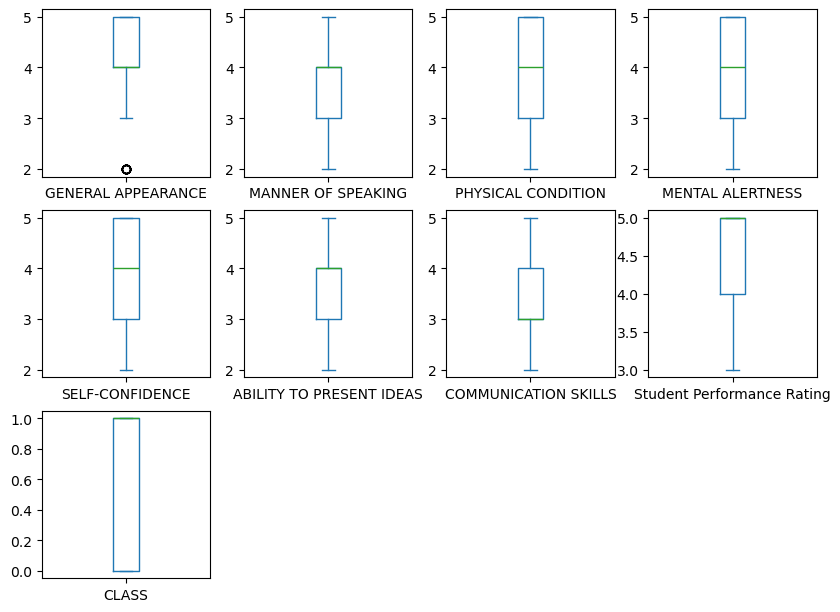

In [37]:
# Boxplots for detecting outliers
data.plot(kind = 'box', subplots = True, layout = (4,4), figsize = (10,10));

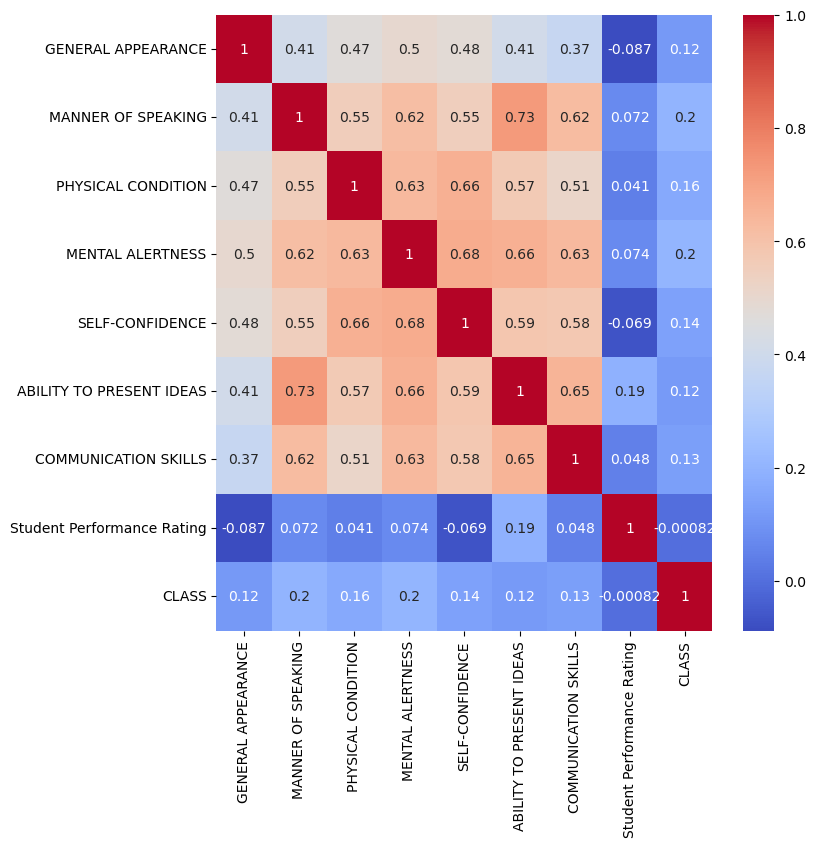

In [38]:
corr = data.drop(['Name of Student'], axis = 1).corr()

# corr heatmap
plt.figure(figsize = (8,8));
sns.heatmap(corr, cmap = 'coolwarm', annot = True);

## Decision Tree & Random Forest Classifiers

In [39]:
from sklearn.model_selection import train_test_split
X = data.drop(['CLASS', 'Name of Student'], axis = 1)
y = data['CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2385, 8), (597, 8), (2385,), (597,))

In [40]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [41]:
models = []
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))

In [42]:
from sklearn import metrics
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(f'Accuracy Score:\n{tr_split}')


Accuracy Score:
  Name     Score
0   RF  0.909548
1   DT  0.909548


### Evaluation

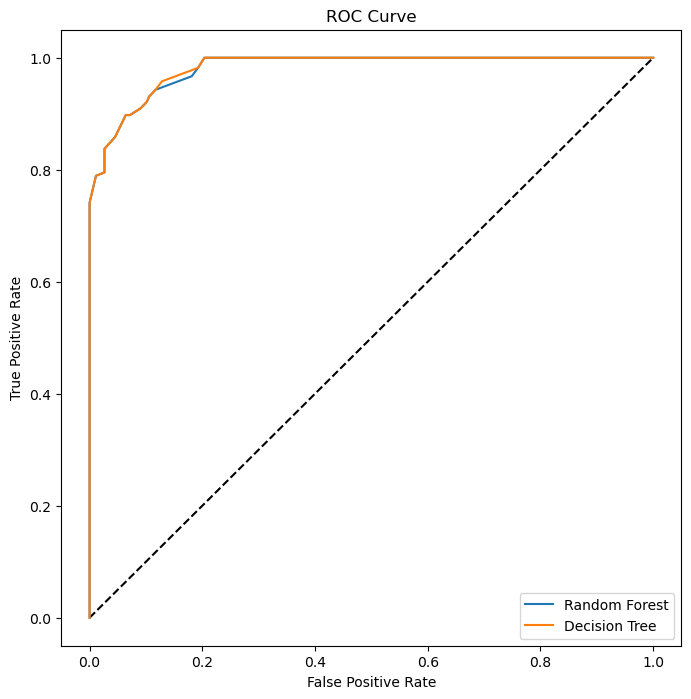

AUC Score for Random Forest: 0.9098999772675608
AUC Score for Decision Tree: 0.9095362582405092


In [46]:
# Evaluate both models using: ROC Curve and AUC Score., Confusion Matrix, and Classification Report (Precision, Accuracy, F1-score, Recall)

from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report

# ROC Curve and AUC Score
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
y_pred_prob = dt.predict_proba(X_test)[:,1]
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob)

plt.figure(figsize = (8,8))
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label = 'Random Forest')
plt.plot(fpr_dt, tpr_dt, label = 'Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print(f'AUC Score for Random Forest: {roc_auc_score(y_test, rf.predict(X_test))}')
print(f'AUC Score for Decision Tree: {roc_auc_score(y_test, dt.predict(X_test))}')


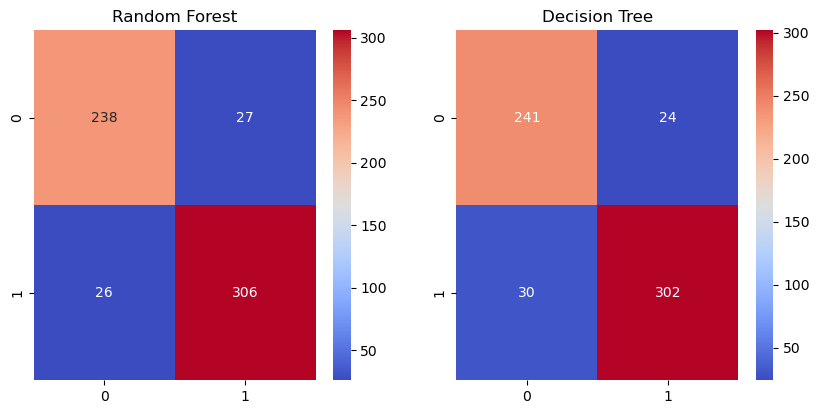

In [44]:
# Confusion Matrix
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
cm = confusion_matrix(y_test, rf.predict(X_test))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.title('Random Forest')
plt.subplot(2,2,2)
cm = confusion_matrix(y_test, dt.predict(X_test))
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'coolwarm')
plt.title('Decision Tree')
plt.show()

In [45]:
# Classification Report (Precision, Accuracy, F1-score, Recall)
print('Classification Report for Random Forest:')
print(classification_report(y_test, rf.predict(X_test)))
print('Classification Report for Decision Tree:')
print(classification_report(y_test, dt.predict(X_test)))

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.90      0.90      0.90       265
           1       0.92      0.92      0.92       332

    accuracy                           0.91       597
   macro avg       0.91      0.91      0.91       597
weighted avg       0.91      0.91      0.91       597

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       265
           1       0.93      0.91      0.92       332

    accuracy                           0.91       597
   macro avg       0.91      0.91      0.91       597
weighted avg       0.91      0.91      0.91       597

